In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD
from pydmd import MrDMD
from pydmd import SpDMD
from pydmd import FbDMD

Take a Numpy array and perform DMD

In [11]:
file_dir = r'D:\Pycharm Projects\EEG-Game\EEGNetExports\EEG-Game_Josh Schrock_EPOCFLEX-F0000172_EPOCFLEX_123045_2022.06.21T14.54.07.04.00\plv\alpha'
file = f'{file_dir}\\Numpy_Net_of_EEG-Game_Josh Schrock_EPOCFLEX-F0000172_EPOCFLEX_123045_2022.06.21T14.54.07.04.00.npy'
X = np.load(file)

Set up DMD

In [12]:
matricies = []
print(X.shape)
for i in range(X.shape[0]):
    matricies.append(X[i])
    print(X[i].shape)

dmd = MrDMD(dmd=DMD())
dmd.fit(matricies)

(33, 14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


C:\Users\Joshu\AppData\Local\Programs\Python\Python310\lib\site-packages\pydmd\mrdmd.py:499: ComplexWarning: Casting complex values to real discards the imaginary part
  ).astype(X.dtype)


Check reconstruction

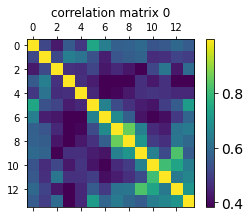

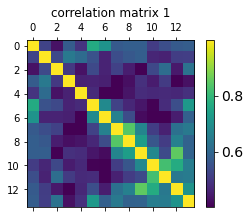

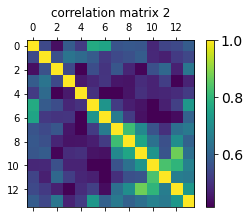

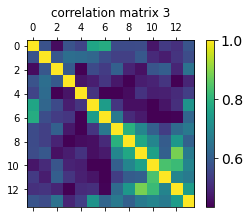

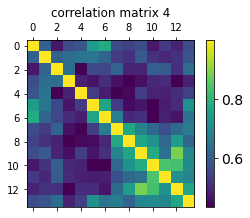

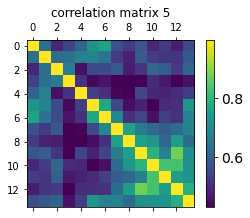

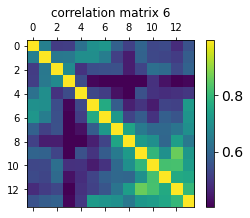

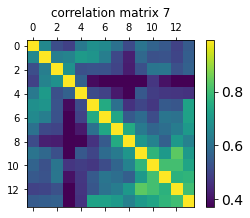

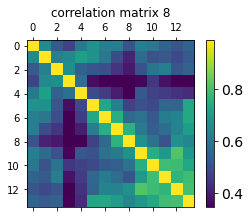

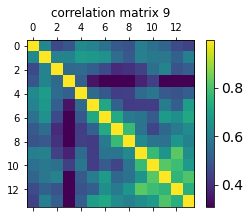

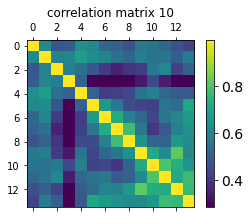

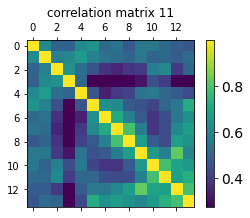

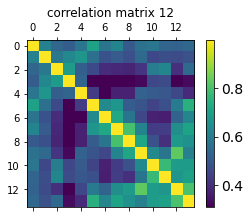

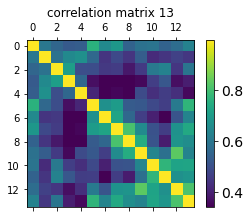

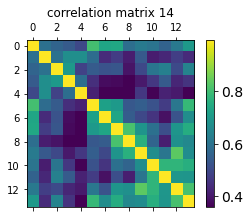

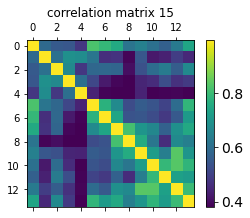

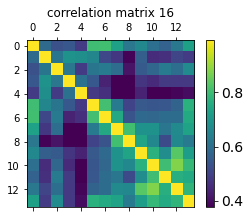

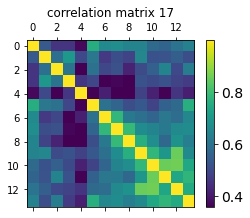

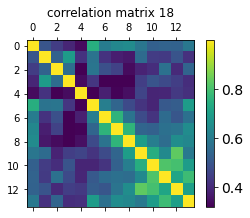

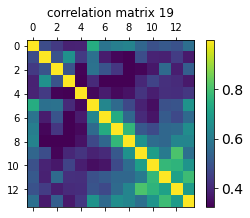

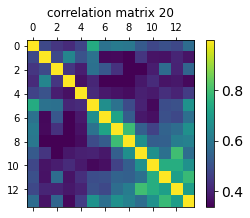

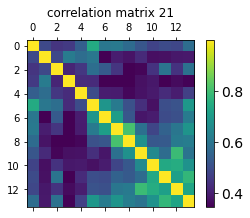

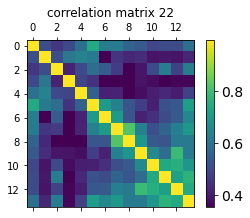

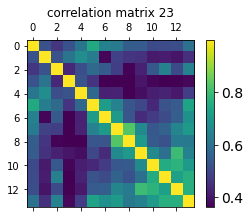

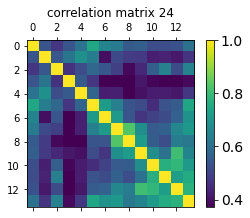

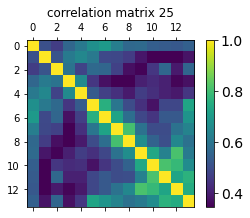

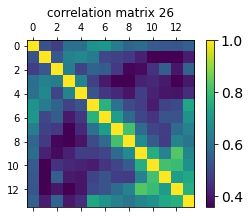

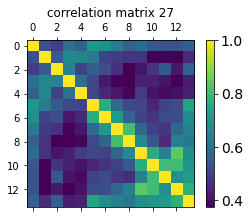

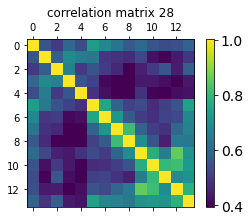

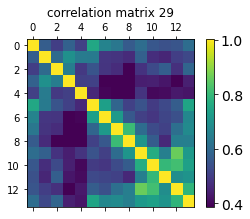

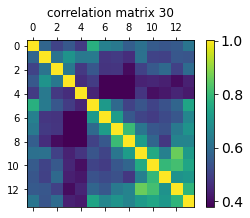

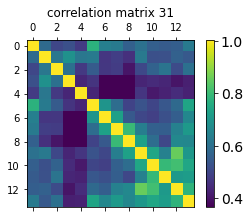

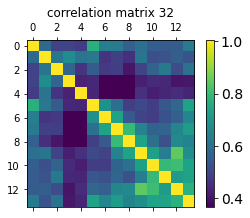

In [13]:
# x1 = np.linspace(14, 0, 14)
# x2 = np.linspace(0, 14, 14)
# x1grid, x2grid = np.meshgrid(x1, x2)
# fig = plt.figure(figsize=(14,14))
for id_subplot, snapshot in enumerate(dmd.reconstructed_data.T, start=0):
    matrix = np.reshape(np.array(snapshot.real), (-1, 14))
    color_lims = np.percentile(matrix, [5, 95])
    f = plt.figure(figsize=(4, 3))
    plt.matshow(matrix.tolist(), fignum=f.number, clim=color_lims)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title(f'correlation matrix {str(id_subplot)}')

Plot EigenValues

The number of eigenvalues is 13


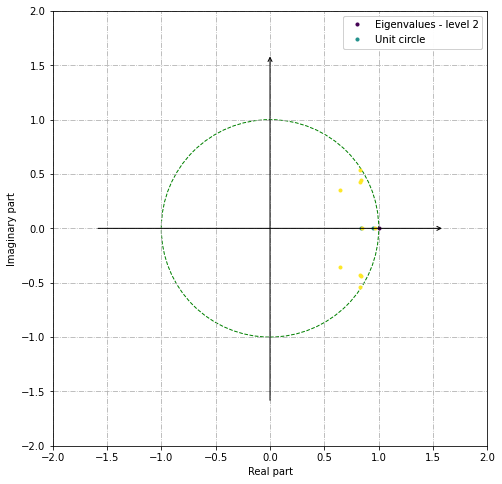

In [14]:
print('The number of eigenvalues is {}'.format(dmd.eigs.shape[0]))
dmd.plot_eigs(show_axes=True, show_unit_circle=True, figsize=(8, 8))

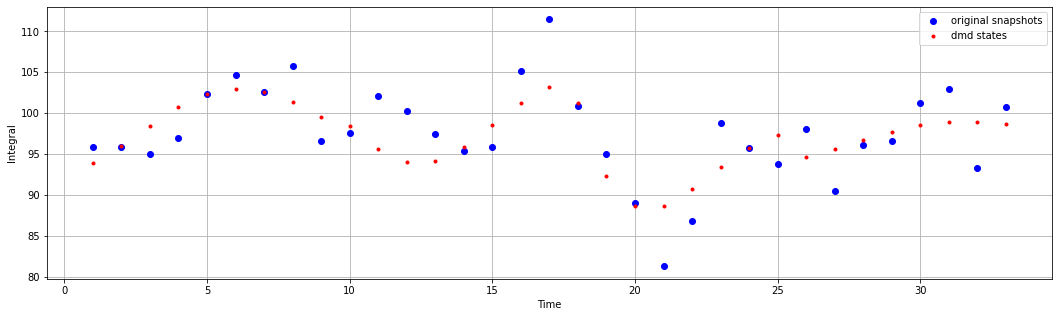

In [15]:
import scipy.integrate

x1 = np.linspace(0, 14, 14)
x2 = np.linspace(0, 14, 14)
x1grid, x2grid = np.meshgrid(x1, x2)

dmd_states = [state.reshape(x1grid.shape) for state in dmd.reconstructed_data.T]
compute_integral = scipy.integrate.trapz

original_int = [compute_integral(compute_integral(matrix)).real for matrix in matricies]
dmd_int = [compute_integral(compute_integral(state)).real for state in dmd_states]

figure = plt.figure(figsize=(18, 5))
plt.plot(dmd.original_timesteps[1:], original_int, 'bo', label='original snapshots')
plt.plot(dmd.dmd_timesteps[1:], dmd_int, 'r.', label='dmd states')
plt.ylabel('Integral')
plt.xlabel('Time')
plt.grid()
leg = plt.legend()